# DoS Attack Detection in Wireless Sensor Networks using Machine Learning

This notebook demonstrates how to detect Denial-of-Service (DoS) attacks in Wireless Sensor Networks (WSN) using lightweight machine learning techniques. We will use the WSN-DS dataset and follow a step-by-step approach from data exploration to model evaluation and visualization.

## 1. Import Required Libraries
Import Python libraries such as pandas, numpy, scikit-learn, matplotlib, and seaborn for data handling, machine learning, and visualization.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

## 2. Load and Explore the Dataset
Load the WSN dataset containing normal and DoS attack records. Display basic statistics, check for missing values, and visualize class distribution.

In [2]:
# Load the dataset
file_path = './Dataset/WSN-DS.csv'
df = pd.read_csv(file_path)

df.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [3]:
# Display basic statistics and info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


In [4]:
# Check for missing values
missing = df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

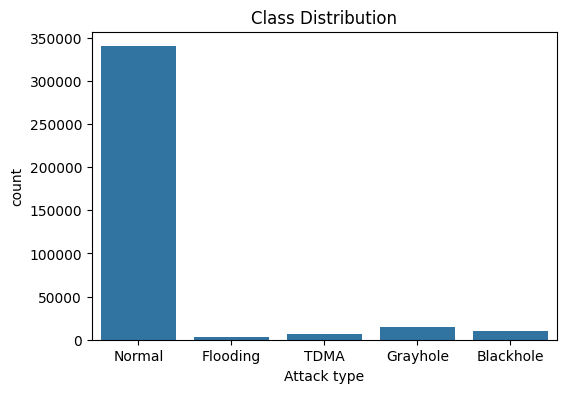

In [5]:
# Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df.columns[-1], data=df)
plt.title('Class Distribution')
plt.show()

## 3. Preprocess the Data
Handle missing values, encode categorical features, and normalize or standardize numerical features as needed.

In [6]:
# Fill missing values (if any) with column mean for numeric, mode for categorical
def fill_missing(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
fill_missing(df)

# Encode categorical features (if any)
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4. Feature Selection
Apply feature selection techniques (e.g., correlation analysis, mutual information, or tree-based feature importance) to identify the most relevant features for DoS detection.

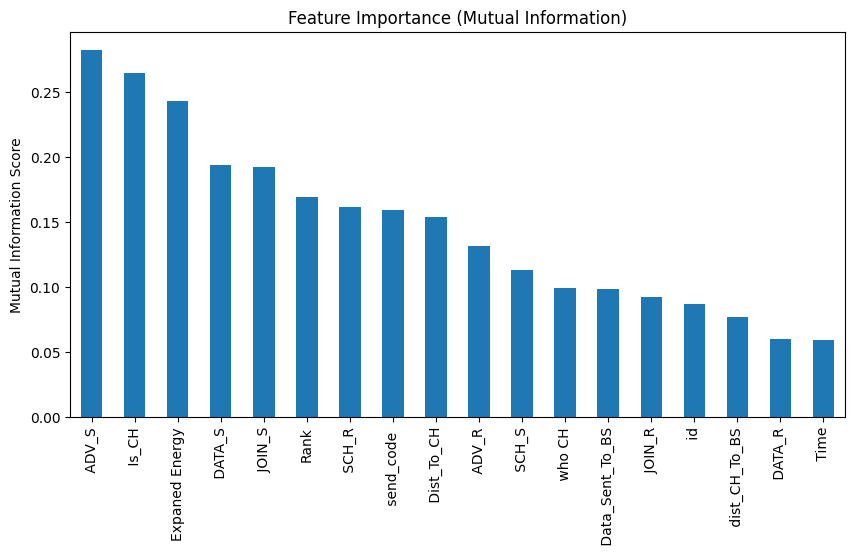

In [7]:
# Mutual Information for feature selection
mi = mutual_info_classif(X_scaled, y)
mi_series = pd.Series(mi, index=df.columns[:-1]).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10,5))
mi_series.plot(kind='bar')
plt.title('Feature Importance (Mutual Information)')
plt.ylabel('Mutual Information Score')
plt.show()

# Select top features (e.g., top 10)
top_features = mi_series.head(10).index
X_selected = X[top_features]

## 5. Split Data into Training and Test Sets
Split the preprocessed dataset into training and test sets using scikit-learn's train_test_split function.

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
print(f'Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}')

Training samples: 299728, Test samples: 74933


## 6. Train Machine Learning Models
Train lightweight machine learning models such as Decision Tree, Random Forest, and Logistic Regression on the training data.

In [9]:
# Train models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

models = {'Decision Tree': dt, 'Random Forest': rf, 'Logistic Regression': lr}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained.')

Decision Tree trained.
Random Forest trained.
Logistic Regression trained.


## 7. Evaluate Model Performance
Evaluate the trained models using metrics like accuracy, precision, recall, F1-score, and ROC-AUC. Display confusion matrices and ROC curves.


Decision Tree Performance:
Accuracy: 0.9724
Precision: 0.9729
Recall: 0.9724
F1-score: 0.9726
ROC-AUC: 0.9277349145200187


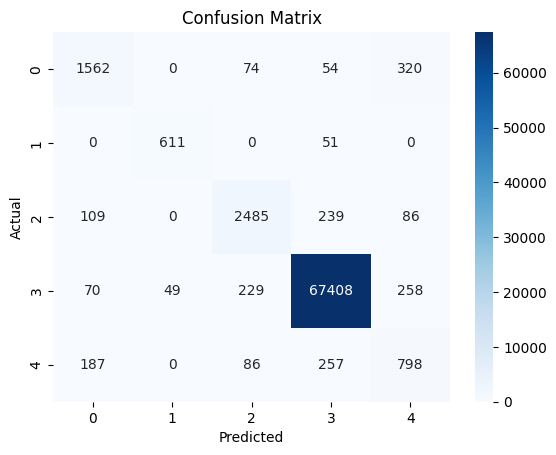


Random Forest Performance:
Accuracy: 0.9744
Precision: 0.9744
Recall: 0.9744
F1-score: 0.9744
ROC-AUC: 0.9779205300741107


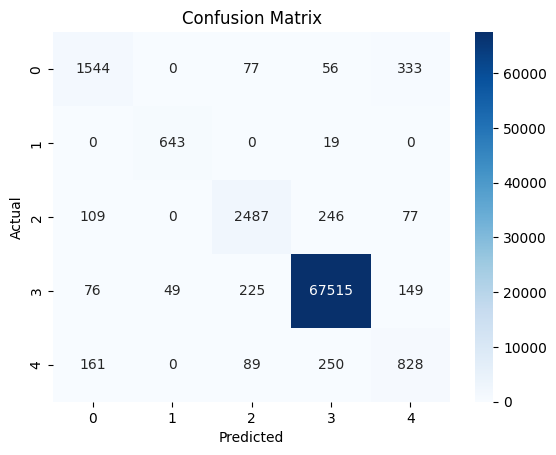


Logistic Regression Performance:
Accuracy: 0.9460
Precision: 0.9410
Recall: 0.9460
F1-score: 0.9428
ROC-AUC: 0.9826311244726608


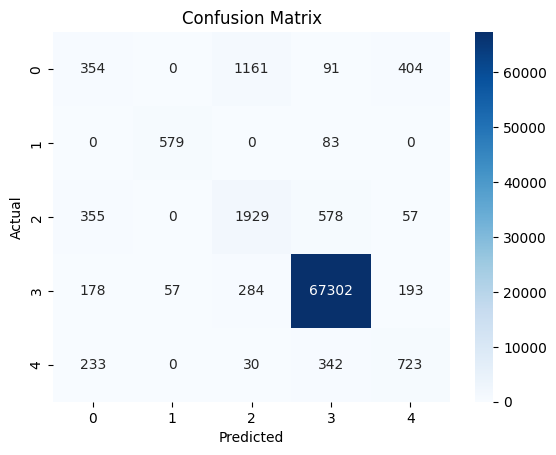

In [10]:
# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Handle multiclass ROC-AUC
    if y_prob is not None:
        if y_prob.shape[1] == 2:
            roc_auc = roc_auc_score(y_test, y_prob[:,1])
        else:
            roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        roc_auc = 'N/A'
    cm = confusion_matrix(y_test, y_pred)
    print(f'Accuracy: {acc:.4f}\nPrecision: {prec:.4f}\nRecall: {rec:.4f}\nF1-score: {f1:.4f}\nROC-AUC: {roc_auc}')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    # ROC curve for binary classification only
    if y_prob is not None and y_prob.shape[1] == 2:
        fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
        plt.plot(fpr, tpr, label='ROC curve')
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

for name, model in models.items():
    print(f'\n{name} Performance:')
    evaluate_model(model, X_test, y_test)

## 8. Detect DoS Attacks in New Data
Demonstrate how to use the trained model to predict DoS attacks on new, unseen data samples.

In [11]:
# Example: Predict on new data (using Random Forest as best model)
# Replace with actual new data sample as needed
new_sample = X_test.iloc[0:1]
prediction = rf.predict(new_sample)
print('Predicted class for new sample:', prediction[0])

Predicted class for new sample: 3


## 9. Visualize Results
Create visualizations such as feature importance plots, confusion matrices, and ROC curves to interpret the results.

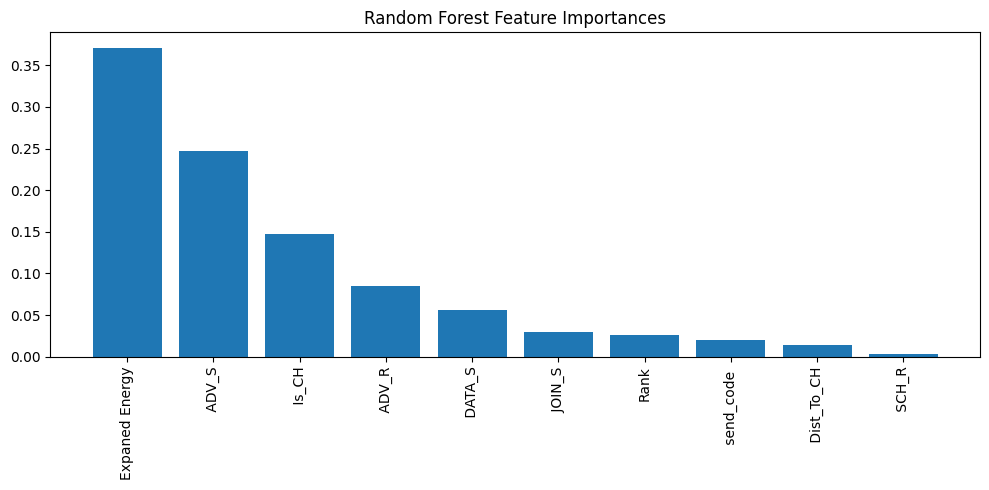

In [12]:
# Feature importance from Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title('Random Forest Feature Importances')
plt.bar(range(X_selected.shape[1]), importances[indices], align='center')
plt.xticks(range(X_selected.shape[1]), X_selected.columns[indices], rotation=90)
plt.tight_layout()
plt.show()